In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Copy_of_wgbh.csv', index_col='DateEntered', parse_dates=True, )
df.head()

,Agency,ProjectName,ProjectAddress_1,Developer,GeneralContractor,SubContractor,SubContractorAddress_1,SubContractorAddress_2,Trade,SEX,MINOR,Race_Desc,RESIDENT,TotalHours
DateEntered,,,,,,,,,,,,,,
2025-09-09,COB,7042 JAMAICA PLAIN LIBRARY,12 SEDGWICK STREET,CITY OF BOSTON / PFD,COLANTONIO INCORPORATED,KAPILOFF'S GLASS INC,47 NEW ASHFORD RD,NaN,NO WORK,M,N,CAUCASIAN,N,0.0
2021-03-21,COB,7123 ADAMS BRANCH LIBRARY RENOVATIONS,"690 ADAMS STREET DORCHESTER, MA 02122",CITY OF BOSTON / PFD,J & J CONTRACTORS INC,NORTH EAST ENERGY CONTROL,50 GETCHELL WAY,NaN,NO WORK,M,N,CAUCASIAN,N,0.0
2021-03-19,COB,7098 BPL RARE BOOKS RENOVATIONS,700 BOYLSON STREET,CITY OF BOSTON / PFD,BOSTON BUILDING & BRIDGE,J.R.J. CONSTRUCTION CO.,71 B WASHINGTON ST.,NaN,NO WORK,M,N,CAUCASIAN,N,0.0
2021-03-19,COB,7098 BPL RARE BOOKS RENOVATIONS,700 BOYLSON STREET,CITY OF BOSTON / PFD,BOSTON BUILDING & BRIDGE,RICMOR CONSTRUCTION INC.,3 BERT DRIVE SUITE #8,NaN,NO WORK,M,N,CAUCASIAN,N,0.0
2021-03-17,COB,7101 NEW EAST BOSTON POLICE STATION,"338 EAST EAGLE STREET EAST BOSTON, MA",CITY OF BOSTON / PFD,J & J CONTRACTORS INC,BACK BAY CONCRETE,87 NEW SALEM ST,NaN,NO WORK,M,N,CAUCASIAN,N,0.0


In [3]:
# convert index to yearly DateTime object
df.index = df.index.to_period('Y')

In [4]:
df = df.drop(df.index[0])

In [5]:
df.dropna()
df['RESIDENT'].unique()

array(['N', 'Y', 'n', 'y', nan], dtype=object)

In [6]:
summary = pd.DataFrame(columns=['Trade', 'Y', 'N', 'TOTAL_PROJECTS'])
trades = df['Trade'].unique()
groups = df.groupby(df.Trade)
res = ['Y', 'N']

# compute percentage of employees for each trade by residency
for i in range(len(trades)):
    temp = groups.get_group(trades[i])
    filt1 = temp['RESIDENT'] == 'Y'
    filt2 = temp['RESIDENT'] == 'y'
    filt3 = temp['RESIDENT'] == 'N'
    filt4 = temp['RESIDENT'] == 'n'
    Y = temp[filt1]
    y = temp[filt2]
    N = temp[filt3]
    n = temp[filt4]
    num_res = Y.shape[0] + y.shape[0]
    num_non_res = N.shape[0] + n.shape[0]
    summary.loc[len(summary.index)] = [trades[i], num_res, num_non_res, num_res + num_non_res]
    

In [7]:
summary

,Trade,Y,N,TOTAL_PROJECTS
0,NO WORK,0,37903,37903
1,Waterproofer,1326,2045,3371
2,Electrician,16740,21033,37773
3,Iron Worker,14319,20585,34904
4,Plumber,7128,10668,17796
...,...,...,...,...
96,Curbsetter/Paver,4,4,8
97,RAKER,0,1,1
98,DOCK BUILDER,0,1,1
99,BOILERMAKERS,0,1,1


In [8]:
# convert absolute values into percentages
for i in range(len(summary.index)):
    summary.loc[i, 'Y'] = summary.loc[i, 'Y'] / summary.loc[i, 'TOTAL_PROJECTS']
    summary.loc[i, 'N'] = summary.loc[i, 'N'] / summary.loc[i, 'TOTAL_PROJECTS']

In [9]:
summary.columns = ['Trade', 'Resident', 'Non-resident', 'Total_Workers']
summary.to_csv('Workforce_Comp_By_Residency.csv')

In [10]:
df.head()

,Agency,ProjectName,ProjectAddress_1,Developer,GeneralContractor,SubContractor,SubContractorAddress_1,SubContractorAddress_2,Trade,SEX,MINOR,Race_Desc,RESIDENT,TotalHours
DateEntered,,,,,,,,,,,,,,
2021,COB,7123 ADAMS BRANCH LIBRARY RENOVATIONS,"690 ADAMS STREET DORCHESTER, MA 02122",CITY OF BOSTON / PFD,J & J CONTRACTORS INC,NORTH EAST ENERGY CONTROL,50 GETCHELL WAY,NaN,NO WORK,M,N,CAUCASIAN,N,0.0
2021,COB,7098 BPL RARE BOOKS RENOVATIONS,700 BOYLSON STREET,CITY OF BOSTON / PFD,BOSTON BUILDING & BRIDGE,J.R.J. CONSTRUCTION CO.,71 B WASHINGTON ST.,NaN,NO WORK,M,N,CAUCASIAN,N,0.0
2021,COB,7098 BPL RARE BOOKS RENOVATIONS,700 BOYLSON STREET,CITY OF BOSTON / PFD,BOSTON BUILDING & BRIDGE,RICMOR CONSTRUCTION INC.,3 BERT DRIVE SUITE #8,NaN,NO WORK,M,N,CAUCASIAN,N,0.0
2021,COB,7101 NEW EAST BOSTON POLICE STATION,"338 EAST EAGLE STREET EAST BOSTON, MA",CITY OF BOSTON / PFD,J & J CONTRACTORS INC,BACK BAY CONCRETE,87 NEW SALEM ST,NaN,NO WORK,M,N,CAUCASIAN,N,0.0
2021,COB,7101 NEW EAST BOSTON POLICE STATION,"338 EAST EAGLE STREET EAST BOSTON, MA",CITY OF BOSTON / PFD,J & J CONTRACTORS INC,RICMOR CONSTRUCTION INC.,3 BERT DRIVE SUITE #8,NaN,NO WORK,M,N,CAUCASIAN,N,0.0


In [11]:
years = df.index.unique()
summary2 = pd.DataFrame(columns=['Year', 'Resident', 'Non-resident', 'Total'])

annual_groups = df.groupby(df.index)

# compute annual composition by residency
for year in years:
    temp = annual_groups.get_group(year)
    filt1 = temp['RESIDENT'] == 'Y'
    filt2 = temp['RESIDENT'] == 'y'
    filt3 = temp['RESIDENT'] == 'N'
    filt4 = temp['RESIDENT'] == 'n'
    Y = temp[filt1]
    y = temp[filt2]
    N = temp[filt3]
    n = temp[filt4]
    num_res = Y.shape[0] + y.shape[0]
    num_non_res = N.shape[0] + n.shape[0]
    summary2.loc[len(summary2.index)] = [year, num_res, num_non_res, num_res + num_non_res]

In [12]:
summary2

,Year,Resident,Non-resident,Total
0,2021,6528,13605,20133
1,2020,33882,73873,107755
2,2019,54741,100595,155336
3,2018,50933,93421,144354
4,2017,49452,83123,132575
5,2016,26824,47484,74308


<AxesSubplot:title={'center':'Annual Composition By Residency'}, xlabel='Year'>

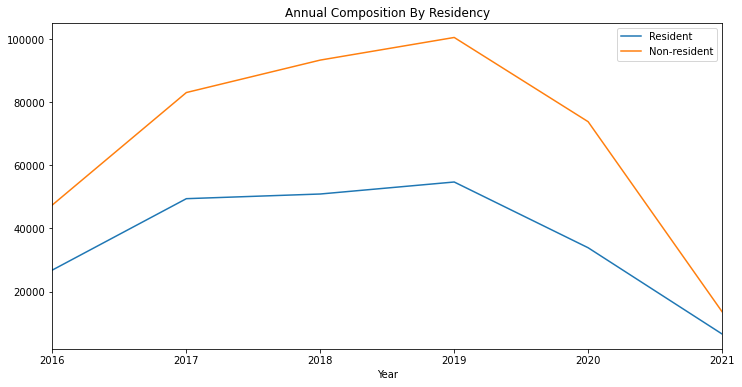

In [13]:
summary2.set_index('Year', inplace=True)
summary2.drop(['Total'], axis=1).plot(figsize=(12, 6), legend=True, title='Annual Composition By Residency')

<AxesSubplot:title={'center':'Annual Change in Composition By Residency'}, xlabel='Year'>

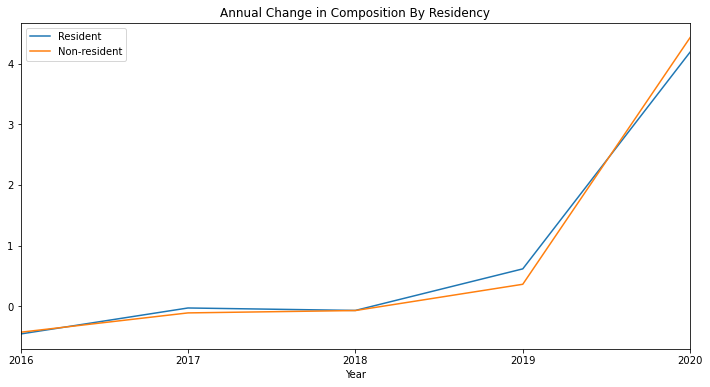

In [14]:
comp_change = summary2.loc[:, ['Resident', 'Non-resident']].pct_change().dropna()
comp_change.plot(figsize=(12, 6), legend=True, title='Annual Change in Composition By Residency')